<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

## EDA Section

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
#Initial elimination as per question 1 requested

#We assume there is no duplicates as the unique number of the 'Id' equal to number of rows
house['Id'].nunique()

#remove any houses that are not residential from the dataset.
house = house[house['MSZoning'].str.contains('R')]
house['MSZoning'].value_counts()

RL    1151
RM     218
RH      16
Name: MSZoning, dtype: int64

In [5]:
#drop the 'Id' columns
house.drop('Id', inplace=True, axis=1)

In [6]:
for items in house:
    print items, house[items].nunique()

MSSubClass 15
MSZoning 3
LotFrontage 110
LotArea 1033
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 320
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 623
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 756
TotalBsmtSF 704
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 728
2ndFlrSF 397
LowQualFinSF 22
GrLivArea 832
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 96
GarageFinish 3
GarageCars 5
GarageArea 433
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 269
OpenPorchSF 193
EnclosedPorch 118
3SsnPorch 20
ScreenPorch 75
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscVal 19
Mo

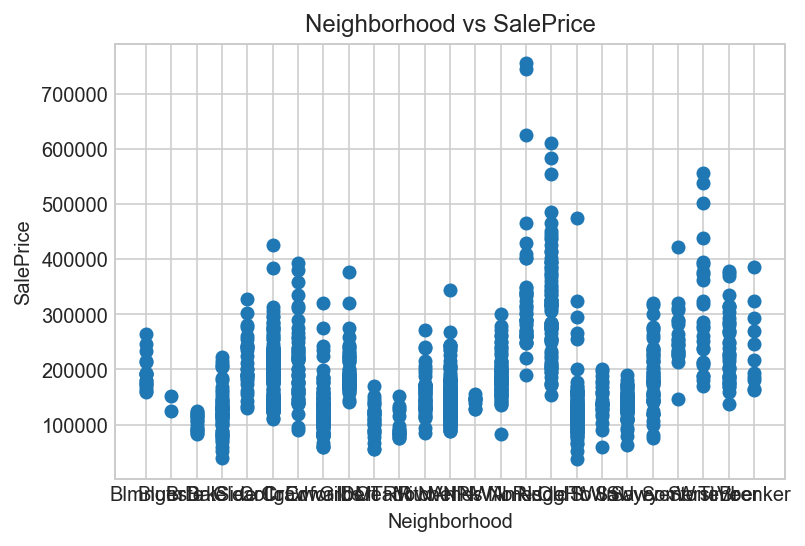

In [7]:
#Neighborhood
plt.scatter(house.Neighborhood, house.SalePrice)

plt.title("Neighborhood vs SalePrice")
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.show()

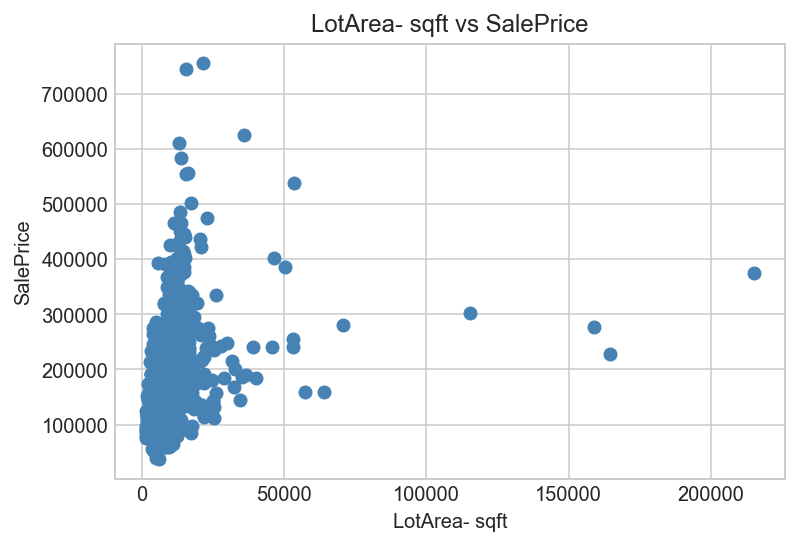

In [8]:
#In my opinion, the lot Area represent the total square of the land
plt.scatter(house.LotArea, house.SalePrice, c = "steelblue")

plt.title("LotArea- sqft vs SalePrice")
plt.xlabel("LotArea- sqft")
plt.ylabel("SalePrice")
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53            20       RL         68.0    50271   Pave   NaN      IR1   
66            20       RL          NaN    19900   Pave   NaN      Reg   
113           20       RL          NaN    21000   Pave   NaN      Reg   
120           80       RL          NaN    21453   Pave   NaN      IR1   
159           60       RL        134.0    19378   Pave   NaN      IR1   
171           20       RL        141.0    31770   Pave   NaN      IR1   
185           75       RM         90.0    22950   Pave   NaN      IR2   
197           75       RL        174.0    25419   Pave   NaN      Reg   
249           50       RL          NaN   159000   Pave   NaN      IR2   
260           80       RL        120.0    19296   Pave   NaN      Reg   
271           20       RL         73.0    39104   Pave   NaN      IR1   
277           20       RL        140.0    19138   Pave   NaN      Reg   
304           75       RM         87.0    18386   P

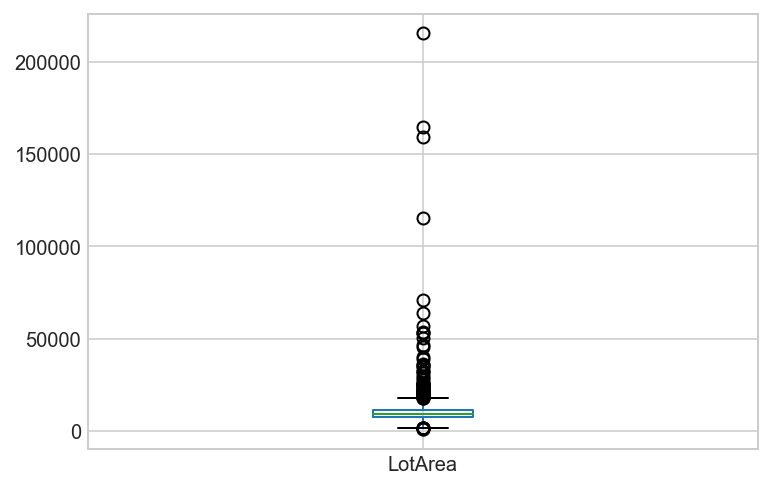

In [9]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['LotArea'].quantile(0.25)
Q3 = house['LotArea'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['LotArea'].plot(kind='box')

# print out all the list of outlier
print house[house['LotArea'] >= Q3+1.5*IQR]
print house[house['LotArea'] <= Q1-1.5*IQR]

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53            20       RL         68.0    50271   Pave   NaN      IR1   
66            20       RL          NaN    19900   Pave   NaN      Reg   
113           20       RL          NaN    21000   Pave   NaN      Reg   
120           80       RL          NaN    21453   Pave   NaN      IR1   
159           60       RL        134.0    19378   Pave   NaN      IR1   
171           20       RL        141.0    31770   Pave   NaN      IR1   
185           75       RM         90.0    22950   Pave   NaN      IR2   
197           75       RL        174.0    25419   Pave   NaN      Reg   
249           50       RL          NaN   159000   Pave   NaN      IR2   
260           80       RL        120.0    19296   Pave   NaN      Reg   
271           20       RL         73.0    39104   Pave   NaN      IR1   
277           20       RL        140.0    19138   Pave   NaN      Reg   
304           75       RM         87.0    18386   P

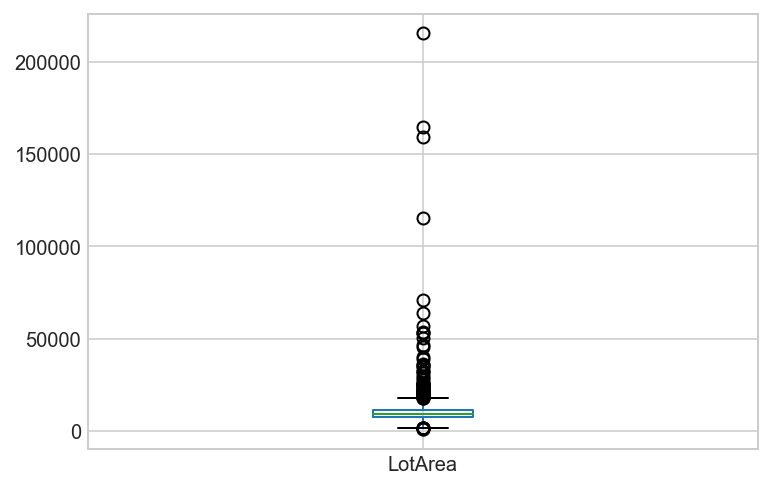

In [10]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['LotArea'].quantile(0.25)
Q3 = house['LotArea'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['LotArea'].plot(kind='box')

# print out all the list of outlier
print house[house['LotArea'] >= Q3+1.5*IQR]
print house[house['LotArea'] <= Q1-1.5*IQR]


In [11]:
#Total bathroom and bedroom

#One of the half bathroom considered as half size of the full bathroom, hence, divided by 2

house['Total bathroom and bedroom']= house['BsmtFullBath'] + 0.5*house['BsmtHalfBath'] + house['FullBath'] + 0.5*house['HalfBath'] + house['BedroomAbvGr']
house.drop('BsmtFullBath', inplace=True, axis=1)
house.drop('BsmtHalfBath', inplace=True, axis=1)
house.drop('FullBath', inplace=True, axis=1)
house.drop('HalfBath', inplace=True, axis=1)
house.drop('BedroomAbvGr', inplace=True, axis=1)

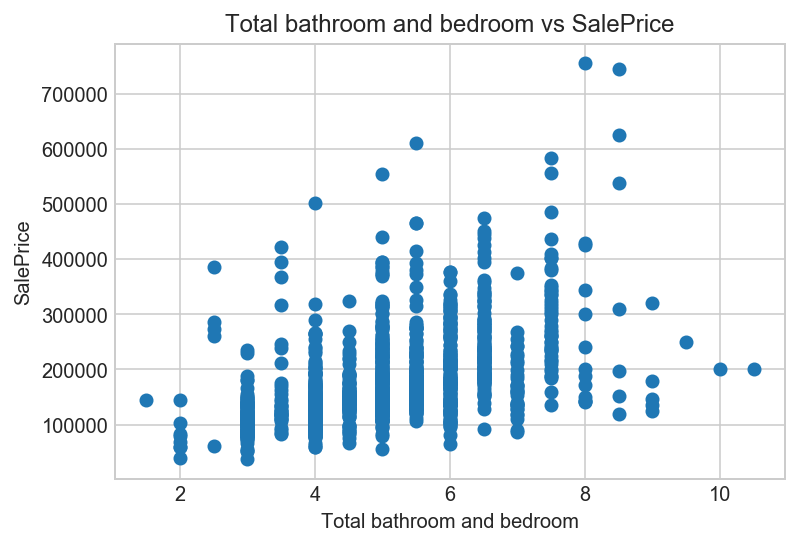

In [12]:
plt.scatter(x= house['Total bathroom and bedroom'], y=house.SalePrice)

plt.title("Total bathroom and bedroom vs SalePrice")
plt.xlabel("Total bathroom and bedroom")
plt.ylabel("SalePrice")
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
118           60       RL         90.0    12376   Pave   NaN      Reg   
144           90       RM         70.0     9100   Pave   NaN      Reg   
291          190       RL         55.0     5687   Pave  Grvl      Reg   
635          190       RH         60.0    10896   Pave  Pave      Reg   
738           90       RL         60.0    10800   Pave   NaN      Reg   
921           90       RL         67.0     8777   Pave   NaN      Reg   
1350          90       RL         91.0    11643   Pave   NaN      Reg   
1386          60       RL         80.0    16692   Pave   NaN      IR1   

     LandContour Utilities LotConfig             ...             PoolQC  \
118          Lvl    AllPub    Corner             ...                NaN   
144          Lvl    AllPub    Inside             ...                NaN   
291          Bnk    AllPub    Inside             ...                NaN   
635          Bnk    AllPub    Inside      

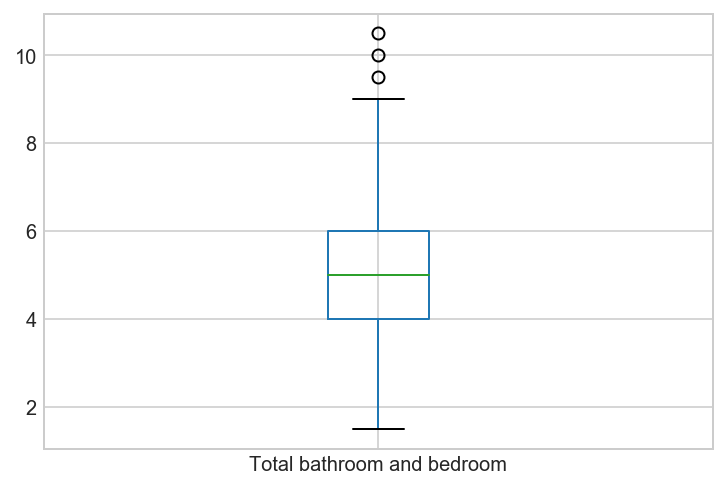

In [13]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['Total bathroom and bedroom'].quantile(0.25)
Q3 = house['Total bathroom and bedroom'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['Total bathroom and bedroom'].plot(kind='box')

# print out all the list of outlier
print house[house['Total bathroom and bedroom'] >= Q3+1.5*IQR]
print house[house['Total bathroom and bedroom'] <= Q1-1.5*IQR]

In [14]:
#Total basement and garage space


house['Total basement and garage space']= house['TotalBsmtSF'] + house['GarageArea']
house.drop('TotalBsmtSF', inplace=True, axis=1)
# house.drop('GarageArea', inplace=True, axis=1)

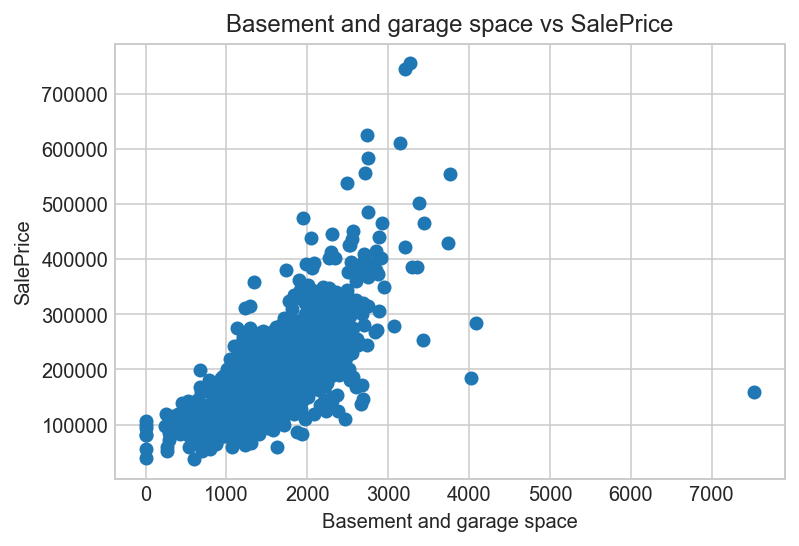

In [15]:
#Basement and garage space = Total square feet of basement and garage space

plt.scatter(x= house['Total basement and garage space'], y=house.SalePrice)

plt.title("Basement and garage space vs SalePrice")
plt.xlabel("Basement and garage space")
plt.ylabel("SalePrice")
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
178           20       RL         63.0    17423   Pave   NaN      IR1   
224           20       RL        103.0    13472   Pave   NaN      Reg   
305           20       RL         80.0    10386   Pave   NaN      Reg   
332           20       RL         85.0    10655   Pave   NaN      IR1   
440           20       RL        105.0    15431   Pave   NaN      Reg   
473           20       RL        110.0    14977   Pave   NaN      IR1   
496           20       RL          NaN    12692   Pave   NaN      IR1   
515           20       RL         94.0    12220   Pave   NaN      Reg   
523           60       RL        130.0    40094   Pave   NaN      IR1   
581           20       RL         98.0    12704   Pave   NaN      Reg   
654           20       RL         91.0    10437   Pave   NaN      IR1   
664           20       RL         49.0    20896   Pave   NaN      IR2   
678           20       RL         80.0    11844   P

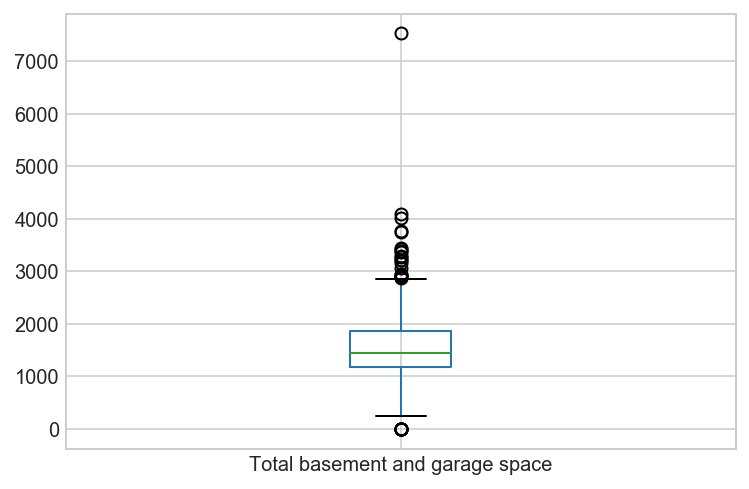

In [16]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['Total basement and garage space'].quantile(0.25)
Q3 = house['Total basement and garage space'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['Total basement and garage space'].plot(kind='box')

# print out all the list of outlier
print house[house['Total basement and garage space'] >= Q3+1.5*IQR]
print house[house['Total basement and garage space'] <= Q1-1.5*IQR]

The mean for Sale Price is 180136.283032
The median for Sale Price is 160000.0


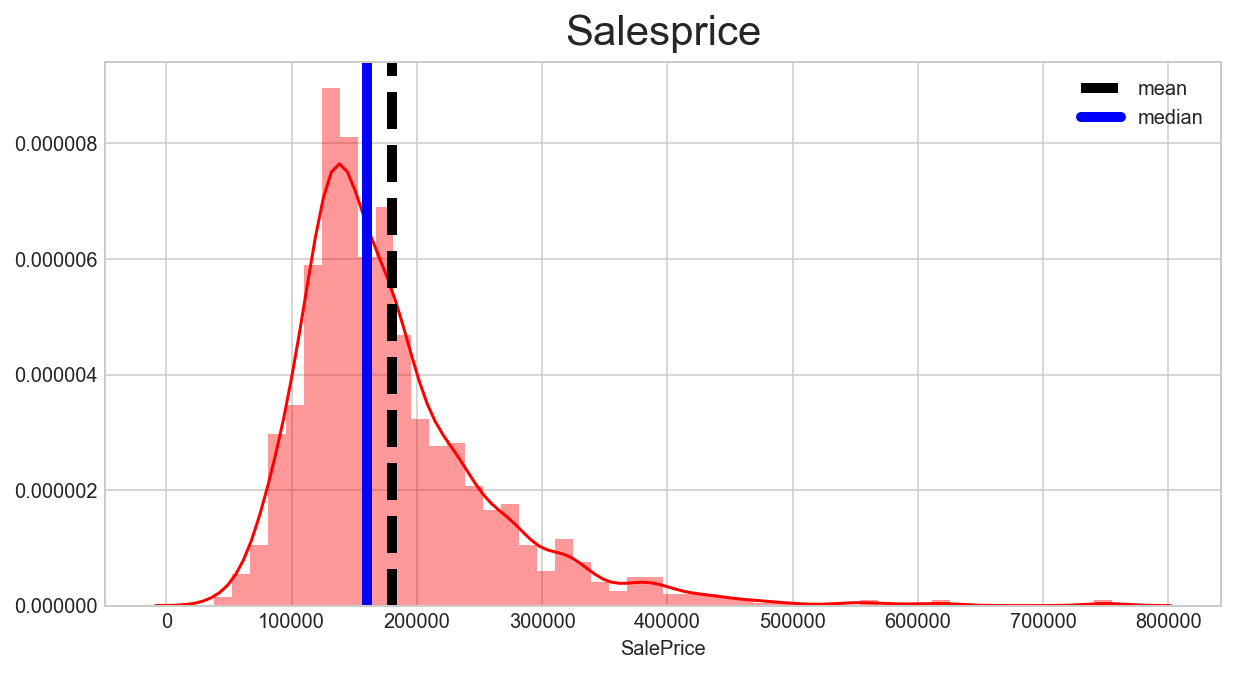

In [17]:
#Distribution of saleprice
fig = plt.figure(figsize=(10,5))


ax = fig.gca()

ax.set_title('Salesprice', fontsize=21, y=1.01)

sns.distplot(house['SalePrice'], bins=50, color='red', ax=ax)

mean=ax.axvline(house['SalePrice'].mean(), color='black', linestyle='--', lw=5)
median=ax.axvline(house['SalePrice'].median(), color='blue', linestyle='-', lw=5)

plt.legend(['mean', 'median'])


print 'The mean for Sale Price is', house['SalePrice'].mean()
print 'The median for Sale Price is', house['SalePrice'].median()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11            60       RL         85.0    11924   Pave   NaN      IR1   
53            20       RL         68.0    50271   Pave   NaN      IR1   
58            60       RL         66.0    13682   Pave   NaN      IR2   
112           60       RL         77.0     9965   Pave   NaN      Reg   
151           20       RL        107.0    13891   Pave   NaN      Reg   
161           60       RL        110.0    13688   Pave   NaN      IR1   
178           20       RL         63.0    17423   Pave   NaN      IR1   
185           75       RM         90.0    22950   Pave   NaN      IR2   
224           20       RL        103.0    13472   Pave   NaN      Reg   
231           60       RL        174.0    15138   Pave   NaN      IR1   
278           20       RL        107.0    14450   Pave   NaN      Reg   
309           20       RL         90.0    12378   Pave   NaN      IR1   
313           20       RL        150.0   215245   P

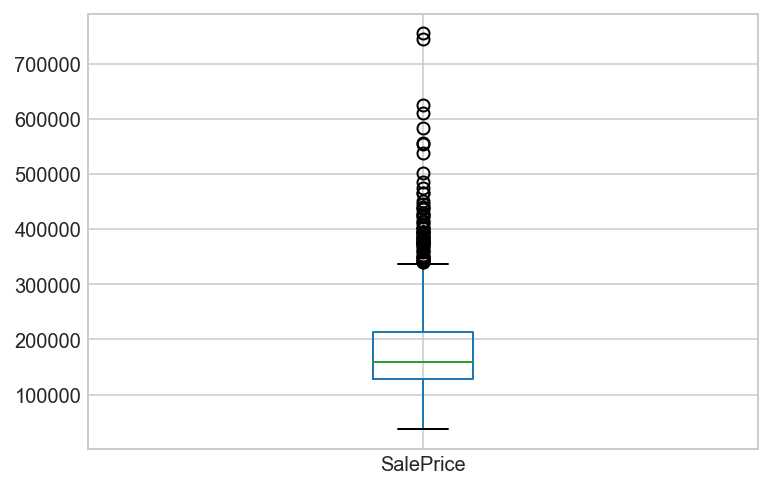

In [18]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['SalePrice'].quantile(0.25)
Q3 = house['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['SalePrice'].plot(kind='box')

# print out all the list of outlier
print house[house['SalePrice'] >= Q3+1.5*IQR]
print house[house['SalePrice'] <= Q1-1.5*IQR]


In [19]:
#Find all the columns with missing values
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage      251
Alley           1320
MasVnrType         5
MasVnrArea         5
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      641
GarageType        79
GarageYrBlt       79
GarageFinish      79
GarageQual        79
GarageCond        79
PoolQC          1378
Fence           1108
MiscFeature     1333
dtype: int64

## Treatment for outliers

**Due to there are a number of outliers, I consider the outliers are relevent to the analysis, hence I do not remove the outliers.**

In [20]:
#Use the value_counts() to look for the types and unique values of the columns then find the best way to treat the missing values

# As per data description, NA means "no alley access"
house.loc[house[house["Alley"].isnull()].index, "Alley"] = 'NA'


# As per data description, NA means "no alley access" "no basement"
house.loc[house[house["BsmtQual"].isnull()].index, "BsmtQual"] = 'NA'

house.loc[house[house["BsmtCond"].isnull()].index, "BsmtCond"] = 'NA'
house.loc[house[house["BsmtExposure"].isnull()].index, "BsmtExposure"] = 'NA'
house.loc[house[house["BsmtFinType1"].isnull()].index, "BsmtFinType1"] = 'NA'
house.loc[house[house["BsmtFinType2"].isnull()].index, "BsmtFinType2"] = 'NA'


# As per data description, NA means "no fence"
house.loc[house[house["Fence"].isnull()].index, "Fence"] = 'NA'

# As per data description, NA means "no fireplace"
house.loc[house[house["FireplaceQu"].isnull()].index, "FireplaceQu"] = 'NA'

# As per data description, NA means "no garage"
house.loc[house[house["GarageType"].isnull()].index, "GarageType"] = 'NA'
house.loc[house[house["GarageFinish"].isnull()].index, "GarageFinish"] = 'NA'
house.loc[house[house["GarageQual"].isnull()].index, "GarageQual"] = 'NA'
house.loc[house[house["GarageCond"].isnull()].index, "GarageCond"] = 'NA'

#If no garage= hence the Year of built also not avaliable
house.loc[house[house["GarageYrBlt"].isnull()].index, "GarageYrBlt"] = 0
house.loc[:, "GarageYrBlt"] = house.loc[:, "GarageYrBlt"].map(lambda x : int (x))

# Treat the missing values as no frontage, hence, the missing values converted to 0 instead. 
house.loc[house[house["LotFrontage"].isnull()].index, "LotFrontage"] = 0.0
house.loc[:, "LotFrontage"] = house.loc[:, "LotFrontage"].map(lambda x : float (x))

# As per data description, NA means "no veneer" hence the square feet for Masonry Veneer area also 0
house.loc[house[house["MasVnrType"].isnull()].index, "MasVnrType"] = None
house.loc[house[house["MasVnrArea"].isnull()].index, "MasVnrArea"] = 0.0
house.loc[:, "MasVnrArea"] = house.loc[:, "MasVnrArea"].map(lambda x : float (x))

# As per data description, NA means "no misc feature"
house.loc[house[house["MiscFeature"].isnull()].index, "MiscFeature"] = 'NA'

# As per data description, NA means "no pool"
house.loc[house[house["PoolQC"].isnull()].index, "PoolQC"] = 'NA'


# Treat the missing value as standard, as auditor always said, immaterial (1 error over 1460 sample)
house.loc[house[house["Electrical"].isnull()].index, "Electrical"] = 'SBrkr'

In [21]:
# use dtypes to check the data types of the columns
house['CentralAir'].dtype

dtype('O')

In [22]:
# counts of unique values of the columns and agreed with data description
house['CentralAir'].value_counts()

Y    1296
N      89
Name: CentralAir, dtype: int64

In [23]:
# In my opinions, I defined the those features with scalar level as renovable/ non-fixed feature
# For the non-fixed feature, I will use the dictionary for the replacement the qualitive scalar to quantitative scalar
house = house.replace({"ExterQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtCond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"NA" : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4},
                       "BsmtFinType1" : {"NA" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"NA" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir" : {"N" : 0, "Y" : 1},
                       "KitchenQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "FireplaceQu" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},    
                       "GarageFinish" : {"NA" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "GarageQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Fence" : {"NA" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4}}
                     )


In [24]:
# for catogorized/fixed feature, I get dummies variables
house = pd.concat([house, pd.get_dummies(house.Condition1, prefix='C1')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Condition2, prefix='C2')], axis=1)
house = pd.concat([house, pd.get_dummies(house.MSZoning, prefix='MS')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Street, prefix='S')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Alley, prefix='A')], axis=1)
house = pd.concat([house, pd.get_dummies(house.LotShape, prefix='LS1')], axis=1)
house = pd.concat([house, pd.get_dummies(house.LandContour, prefix='LC1')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Utilities, prefix='U')], axis=1)
house = pd.concat([house, pd.get_dummies(house.LotConfig, prefix='LC2')], axis=1)
house = pd.concat([house, pd.get_dummies(house.LandSlope, prefix='LS2')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Neighborhood, prefix='N')], axis=1)
house = pd.concat([house, pd.get_dummies(house.BldgType, prefix='BT')], axis=1)
house = pd.concat([house, pd.get_dummies(house.HouseStyle, prefix='HS')], axis=1)
house = pd.concat([house, pd.get_dummies(house.RoofStyle, prefix='RS')], axis=1)
house = pd.concat([house, pd.get_dummies(house.RoofMatl, prefix='RM')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Exterior1st, prefix='E1')], axis=1)
# house['E1_other']= house['E1_Stone']+house['E1_BrkComm']+house['E1_AsphShn']+house['E1_ImStucc']+house['E1_CBlock']
house = pd.concat([house, pd.get_dummies(house.Exterior2nd, prefix='E2')], axis=1)
# house['E2_other']= house['AsphShn']+house['E2_Other']+house['E2_CBlock']
house = pd.concat([house, pd.get_dummies(house.MasVnrType, prefix='MV')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Foundation, prefix='F1')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Heating, prefix='H')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Electrical, prefix='E')], axis=1)
house = pd.concat([house, pd.get_dummies(house.Functional, prefix='F2')], axis=1)
house = pd.concat([house, pd.get_dummies(house.GarageType, prefix='GT')], axis=1)
house = pd.concat([house, pd.get_dummies(house.MiscFeature, prefix='MF')], axis=1)
house = pd.concat([house, pd.get_dummies(house.SaleType, prefix='ST')], axis=1)
house = pd.concat([house, pd.get_dummies(house.SaleCondition, prefix='SC')], axis=1)

#Drop all columns where get dummies
house.drop('Condition1', inplace=True, axis=1)
house.drop('Condition2', inplace=True, axis=1)
house.drop('MSZoning', inplace=True, axis=1)
house.drop('Street', inplace=True, axis=1)
house.drop('Alley', inplace=True, axis=1)
house.drop('LotShape', inplace=True, axis=1)
house.drop('LandContour', inplace=True, axis=1)
house.drop('Utilities', inplace=True, axis=1)
house.drop('LotConfig', inplace=True, axis=1)
house.drop('LandSlope', inplace=True, axis=1)
house.drop('Neighborhood', inplace=True, axis=1)
house.drop('BldgType', inplace=True, axis=1)
house.drop('HouseStyle', inplace=True, axis=1)
house.drop('RoofStyle', inplace=True, axis=1)
house.drop('RoofMatl', inplace=True, axis=1)
house.drop('Exterior1st', inplace=True, axis=1)
house.drop('Exterior2nd', inplace=True, axis=1)
house.drop('MasVnrType', inplace=True, axis=1)
house.drop('Foundation', inplace=True, axis=1)
house.drop('Heating', inplace=True, axis=1)
house.drop('Electrical', inplace=True, axis=1)
house.drop('Functional', inplace=True, axis=1)
house.drop('GarageType', inplace=True, axis=1)
house.drop('MiscFeature', inplace=True, axis=1)
house.drop('SaleType', inplace=True, axis=1)
house.drop('SaleCondition', inplace=True, axis=1)



In [25]:
#Due to there are too many features, I combine some of the features

# Overall quality of the house
house["OverallGrade"] = house["OverallQual"] + house["OverallCond"]
# Overall quality of the garage
house["GarageGrade"] = house["GarageQual"] + house["GarageCond"]
# Overall quality of the exterior
house["ExterGrade"] = house["ExterQual"] + house["ExterCond"]
# Overall kitchen score
house["KitchenScore"] = house["KitchenAbvGr"] * house["KitchenQual"]
# Overall fireplace score
house["FireplaceScore"] = house["Fireplaces"] * house["FireplaceQu"]
# Overall garage score
house["GarageScore"] = house["GarageArea"] * house["GarageQual"]
# Overall pool score
house["PoolScore"] = house["PoolArea"] * house["PoolQC"]
# Total SF for 1st + 2nd floors
house["AllFlrsSF"] = house["1stFlrSF"] + house["2ndFlrSF"]
# Total SF for porch
house["AllPorchSF"] = house["OpenPorchSF"] + house["EnclosedPorch"] +house["3SsnPorch"] + house["ScreenPorch"]


In [26]:
non_fixed_features= house[["OverallGrade", "GarageGrade", "ExterGrade", "KitchenScore", "GarageScore", 
                       "PoolScore", "AllFlrsSF", "AllPorchSF", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", 
                       "GarageFinish", "PavedDrive", "Fence"]]
non_fixed_features.columns

Index([u'OverallGrade', u'GarageGrade', u'ExterGrade', u'KitchenScore',
       u'GarageScore', u'PoolScore', u'AllFlrsSF', u'AllPorchSF', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'HeatingQC', u'CentralAir', u'GarageFinish', u'PavedDrive', u'Fence'],
      dtype='object')

In [27]:
fixed_features=house.drop(non_fixed_features, axis=1)
fixed_features.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'ExterQual', u'ExterCond',
       ...
       u'ST_New', u'ST_Oth', u'ST_WD', u'SC_Abnorml', u'SC_AdjLand',
       u'SC_Alloca', u'SC_Family', u'SC_Normal', u'SC_Partial',
       u'FireplaceScore'],
      dtype='object', length=222)

In [28]:
#Remove all the columns that have been combined
house.drop('OverallQual', inplace=True, axis=1)
house.drop('OverallCond', inplace=True, axis=1)
house.drop('GarageQual', inplace=True, axis=1)
house.drop('GarageCond', inplace=True, axis=1)
house.drop('ExterQual', inplace=True, axis=1)
house.drop('ExterCond', inplace=True, axis=1)
house.drop('KitchenAbvGr', inplace=True, axis=1)
house.drop('KitchenQual', inplace=True, axis=1)
house.drop('Fireplaces', inplace=True, axis=1)
house.drop('FireplaceQu', inplace=True, axis=1)
house.drop('GarageArea', inplace=True, axis=1)
house.drop('PoolArea', inplace=True, axis=1)
house.drop('PoolQC', inplace=True, axis=1)
house.drop('1stFlrSF', inplace=True, axis=1)
house.drop('2ndFlrSF', inplace=True, axis=1)
house.drop('OpenPorchSF', inplace=True, axis=1)
house.drop('EnclosedPorch', inplace=True, axis=1)
house.drop('3SsnPorch', inplace=True, axis=1)
house.drop('ScreenPorch', inplace=True, axis=1)

In [29]:
#get the shape after EDA
house.shape

(1385, 221)

In [30]:
# the value could not be negative, hence, if the value < 0, assign 0 to it

for i in fixed_features.columns.values:
    if i < 0:
        i = 0

## Feature Selection

In [31]:
# Define the independent variables X and dependendt variables y
cols = list(fixed_features.columns)
cols.remove('SalePrice')

X = fixed_features[cols]
y = fixed_features.SalePrice.values

In [32]:
X_train= X[X['YrSold']<2010]
y_train= fixed_features.loc[fixed_features[fixed_features['YrSold']<2010].index, 'SalePrice']
X_test= X[X['YrSold']==2010]
y_test= fixed_features.loc[fixed_features[fixed_features['YrSold']==2010].index, 'SalePrice']

In [33]:
from sklearn.preprocessing import StandardScaler

#Standardize the predictor matrix
ss =StandardScaler()

Xs_train =pd.DataFrame(ss.fit_transform(X_train))
Xs_test =pd.DataFrame(ss.fit_transform(X_test))

In [34]:
#import all necessary tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics

In [35]:
# iterate through folds 5-10
for folds in range(5,10+1):
    print '------------------------------------\n'
    print 'K:', folds
    model = LassoCV()
    
    # Perform cross-validation
    scores = cross_val_score(model, Xs_train, y_train, cv=folds)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model,Xs_train, y_train, cv=folds)
    
    r2 = metrics.r2_score(y_train, predictions)
    print "Cross-Predicted R2:", r2

------------------------------------

K: 5
Cross-validated scores: [0.89508108 0.82481706 0.83178897 0.85701078 0.66794967]
Mean CV R2: 0.8153295124502427
Std CV R2: 0.0776909067553432
Cross-Predicted R2: 0.8097606436785362
------------------------------------

K: 6
Cross-validated scores: [0.90213988 0.88843794 0.81488875 0.77906178 0.82845749 0.50818072]
Mean CV R2: 0.7868610925398603
Std CV R2: 0.13155888658532958
Cross-Predicted R2: 0.7995239458936911
------------------------------------

K: 7
Cross-validated scores: [0.89783978 0.90386676 0.77996546 0.81456548 0.85984063 0.83818443
 0.41008765]
Mean CV R2: 0.786335743554674
Std CV R2: 0.15889712328174002
Cross-Predicted R2: 0.7976563270208152
------------------------------------

K: 8
Cross-validated scores: [0.91440746 0.88321392 0.76959141 0.88448433 0.74354547 0.85012286
 0.84593792 0.34981564]
Mean CV R2: 0.7801398763241639
Std CV R2: 0.1715357732072003
Cross-Predicted R2: 0.7984960689384082
-----------------------------------

**K9 have the highest score, hence we use 10 folds for the train_test_split**

In [36]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=10)

# Train the selector on the data.
skb_f.fit(Xs_train, y_train)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_)], 
                     index=['feature','f_classif']).T.sort_values('f_classif', ascending=False)
kbest

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 54 135 141 158 175 207] are constant.
  UserWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,feature,f_classif
54,C2_RRAn,inf
141,E1_ImStucc,inf
207,ST_Con,inf
158,E2_Other,inf
175,H_Floor,inf
216,SC_Alloca,16.9394
211,ST_New,5.7485
3,OverallQual,5.28839
219,SC_Partial,5.16061
98,N_NridgHt,5.12569


In [37]:
#Recursive Feature Elimination (RFE) with combination with Linear Regression

from sklearn.feature_selection import RFECV

model = LinearRegression()
selector = RFECV(model, step=1, cv=10)
selector = selector.fit(Xs_train, y_train)

In [38]:
rfecv_columns = np.array(cols)[selector.support_]
rfecv_columns

array(['LS2_Gtl', 'LS2_Mod', 'LS2_Sev', 'H_GasA', 'H_GasW', 'H_OthW',
       'H_Wall'], dtype='|S31')

In [39]:
#Find the best alpha parameter through cross-validation
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

900.9589916072068


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished


In [40]:
#Define the lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(Xs_train, y_train)

Lasso(alpha=900.9589916072068, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
#Cross-validate the lasso  R2 with the optimal alpha
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
16,26287.141439,26287.141439,GrLivArea
126,16486.170771,-16486.170771,RM_ClyTile
3,13743.714461,13743.714461,OverallQual
10,10204.741988,10204.741988,BsmtFinSF1
98,8209.368282,8209.368282,N_NridgHt
52,7085.097962,-7085.097962,C2_PosN
211,6269.927727,6269.927727,ST_New
5,6103.730768,6103.730768,YearBuilt
38,6094.132300,6094.132300,Total basement and garage space
97,5753.070386,5753.070386,N_NoRidge


In [42]:
import sklearn.linear_model as linear_model
lr = linear_model.LassoCV()

In [43]:
#Define the kbest_columns and lasso_columns
kbest_columns = kbest.feature.values
lasso_columns = lasso_coefs.variable.values

In [44]:
kbest_columns

array(['C2_RRAn', 'E1_ImStucc', 'ST_Con', 'E2_Other', 'H_Floor',
       'SC_Alloca', 'ST_New', 'OverallQual', 'SC_Partial', 'N_NridgHt',
       'N_NoRidge', 'MiscVal', 'H_Grav', 'ExterQual', 'N_Somerst',
       'GrLivArea', 'C2_PosN', 'S_Pave', 'S_Grvl', 'LotArea',
       'KitchenQual', 'Total basement and garage space', 'MasVnrArea',
       'GarageCars', 'N_Veenker', 'F1_Slab', 'GarageArea', 'LS1_IR3',
       'Total bathroom and bedroom', '1stFlrSF', 'H_Wall', 'MV_Stone',
       'N_Blmngtn', 'YearBuilt', 'ST_WD', 'C1_PosN', 'E2_CmentBd',
       'HS_2.5Fin', 'FireplaceQu', 'FireplaceScore', 'E1_CemntBd',
       'TotRmsAbvGrd', 'RM_WdShngl', 'GT_CarPort', 'F1_PConc',
       'N_StoneBr', 'YearRemodAdd', 'BsmtFinSF1', 'GT_BuiltIn',
       'Fireplaces', '2ndFlrSF', 'ST_Oth', 'N_CollgCr', 'LS1_Reg',
       'N_Timber', 'GT_Attchd', 'N_Crawfor', 'BsmtUnfSF', 'E1_VinylSd',
       'E2_VinylSd', 'SC_Normal', 'C2_RRNn', 'WoodDeckSF', 'RS_Hip',
       '3SsnPorch', 'LS1_IR1', 'MV_None', 'MF_Gar2', 

In [45]:
lasso_columns

array(['GrLivArea', 'RM_ClyTile', 'OverallQual', 'BsmtFinSF1',
       'N_NridgHt', 'C2_PosN', 'ST_New', 'YearBuilt',
       'Total basement and garage space', 'N_NoRidge', 'N_StoneBr',
       'RM_WdShngl', 'ExterQual', 'MasVnrArea', 'KitchenQual',
       'OverallCond', 'BT_1Fam', 'LotArea', 'FireplaceScore', 'PoolQC',
       'GarageCars', 'F2_Typ', 'N_Crawfor', 'E1_BrkFace', '1stFlrSF',
       'C1_Norm', 'YearRemodAdd', 'LC2_CulDSac', 'N_BrkSide',
       'E2_ImStucc', 'WoodDeckSF', 'RS_Gable', 'LowQualFinSF',
       'MV_BrkFace', 'GarageArea', 'BsmtFinSF2', 'MoSold', 'MS_RM',
       'N_NWAmes', 'GT_NA', 'SC_Abnorml', 'LC1_HLS', 'F2_Sev',
       'ScreenPorch', 'H_OthW', 'MSSubClass', 'E2_CmentBd', 'MV_BrkCmn',
       'C1_Artery', 'LS2_Mod', 'LS1_IR2', 'E2_HdBoard', 'ST_Con',
       'KitchenAbvGr', 'OpenPorchSF', 'GT_2Types', 'E2_Wd Shng',
       'F1_PConc', 'BT_Twnhs', 'GT_BuiltIn', 'N_Veenker', 'RM_Membran',
       'ST_COD', 'N_Somerst', 'E1_Plywood', 'SC_Family', 'N_NAmes',
       'U_

In [46]:
kbest_columns

array(['C2_RRAn', 'E1_ImStucc', 'ST_Con', 'E2_Other', 'H_Floor',
       'SC_Alloca', 'ST_New', 'OverallQual', 'SC_Partial', 'N_NridgHt',
       'N_NoRidge', 'MiscVal', 'H_Grav', 'ExterQual', 'N_Somerst',
       'GrLivArea', 'C2_PosN', 'S_Pave', 'S_Grvl', 'LotArea',
       'KitchenQual', 'Total basement and garage space', 'MasVnrArea',
       'GarageCars', 'N_Veenker', 'F1_Slab', 'GarageArea', 'LS1_IR3',
       'Total bathroom and bedroom', '1stFlrSF', 'H_Wall', 'MV_Stone',
       'N_Blmngtn', 'YearBuilt', 'ST_WD', 'C1_PosN', 'E2_CmentBd',
       'HS_2.5Fin', 'FireplaceQu', 'FireplaceScore', 'E1_CemntBd',
       'TotRmsAbvGrd', 'RM_WdShngl', 'GT_CarPort', 'F1_PConc',
       'N_StoneBr', 'YearRemodAdd', 'BsmtFinSF1', 'GT_BuiltIn',
       'Fireplaces', '2ndFlrSF', 'ST_Oth', 'N_CollgCr', 'LS1_Reg',
       'N_Timber', 'GT_Attchd', 'N_Crawfor', 'BsmtUnfSF', 'E1_VinylSd',
       'E2_VinylSd', 'SC_Normal', 'C2_RRNn', 'WoodDeckSF', 'RS_Hip',
       '3SsnPorch', 'LS1_IR1', 'MV_None', 'MF_Gar2', 

In [47]:
lr = linear_model.LassoCV()

# Defining a function to test our best features head to head.
def score(X_train):
    scores = cross_val_score(lr, Xs_train, y_train, cv=10)
    return scores.mean(), scores.std()

# A list of all of our lists of best features being executed in the score function.
all_scores = [
    score(X_train[kbest_columns]),
    score(X_train[rfecv_columns]),
    score(X_train[lasso_columns]),
    score(X_train)]

# Putting results into a DataFrame.
pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['kbest_model', 'rfecv_model', 'lr_model', 'all'])

,mean score,std score
kbest_model,0.821768,0.110564
rfecv_model,0.821768,0.110564
lr_model,0.821768,0.110564
all,0.821768,0.110564


In [48]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ST_New,ST_Oth,ST_WD,SC_Abnorml,SC_AdjLand,SC_Alloca,SC_Family,SC_Normal,SC_Partial,FireplaceScore
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,1,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,1,0,0,0,0,1,0,3
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,1,0,0,0,0,1,0,3
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,1,1,0,0,0,0,0,4
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,1,0,0,0,0,1,0,3
5,50,85.0,14115,5,5,1993,1995,0.0,3,3,...,0,0,1,0,0,0,0,1,0,0
6,20,75.0,10084,8,5,2004,2005,186.0,4,3,...,0,0,1,0,0,0,0,1,0,4
7,60,0.0,10382,7,6,1973,1973,240.0,3,3,...,0,0,1,0,0,0,0,1,0,6
8,50,51.0,6120,7,5,1931,1950,0.0,3,3,...,0,0,1,1,0,0,0,0,0,6
9,190,50.0,7420,5,6,1939,1950,0.0,3,3,...,0,0,1,0,0,0,0,1,0,6


## Based on the score, all 3 models have scores above 82., hence it is considered as good model.

In [49]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_test, y_test, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[0.88379696 0.57451872 0.90298272 0.9047964  0.70893675 0.905718
 0.75999553 0.93716517 0.8385625  0.90669098]
0.8323163728852201


## The score of test set do not vary much, the model is fit well.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [52]:
non_fixed_features.head()

,OverallGrade,GarageGrade,ExterGrade,KitchenScore,GarageScore,PoolScore,AllFlrsSF,AllPorchSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,GarageFinish,PavedDrive,Fence
0,12,6,7,4,1644,0,1710,61,4,3,1,6,1,5,1,2,2,0
1,14,6,6,3,1380,0,1262,0,4,3,4,5,1,5,1,2,2,0
2,12,6,7,4,1824,0,1786,42,4,3,2,6,1,5,1,2,2,0
3,12,6,6,4,1926,0,1717,307,3,4,1,5,1,4,1,1,2,0
4,13,6,7,4,2508,0,2198,84,4,3,3,6,1,5,1,2,2,0


In [53]:
# rfecv model get the best score, we use the rfecv model to predict y_hats

non_fixed_features['y_residual'] = y-model.fit(X[rfecv_columns], y).predict(X[rfecv_columns])
# non_fixed_features['YrSold'] = fixed_features['YrSold']


D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# Define the independent variables X and dependendt variables y

cols = list(non_fixed_features.columns)
cols.remove('y_residual')

X_nf = non_fixed_features[cols]
y_nf = non_fixed_features.y_residual.values


In [55]:
#standardize the X_train and y test
Xs_nf =ss.fit_transform(X_nf)

In [56]:
# iterate through folds 5-10
for folds in range(5,10+1):
    print '------------------------------------\n'
    print 'K:', folds
    model = LassoCV()
    
    # Perform cross-validation
    scores = cross_val_score(model, Xs_nf, y_nf, cv=folds)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, Xs_nf, y_nf, cv=folds)
    
    r2 = metrics.r2_score(y_nf, predictions)
    print "Cross-Predicted R2:", r2

------------------------------------

K: 5
Cross-validated scores: [0.83890255 0.76090067 0.76208226 0.75955864 0.62964401]
Mean CV R2: 0.750217624948819
Std CV R2: 0.06744651832719918
Cross-Predicted R2: 0.7497501095720995
------------------------------------

K: 6
Cross-validated scores: [0.84292479 0.81444504 0.71944328 0.74475905 0.70604665 0.54133031]
Mean CV R2: 0.7281581853729387
Std CV R2: 0.09692085191185376
Cross-Predicted R2: 0.7318728993916607
------------------------------------

K: 7
Cross-validated scores: [0.83852393 0.83700365 0.74291928 0.74538504 0.76450153 0.67444167
 0.5051589 ]
Mean CV R2: 0.7297048563916455
Std CV R2: 0.10587109809146625
Cross-Predicted R2: 0.7343529278243519
------------------------------------

K: 8
Cross-validated scores: [0.83825221 0.82639631 0.72659839 0.7699099  0.75530156 0.75970453
 0.69743401 0.45768075]
Mean CV R2: 0.7289097065923658
Std CV R2: 0.11143747903023471
Cross-Predicted R2: 0.7343854274088897
---------------------------------

## 5 folds give the highest score

In [57]:
# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=5)

# Train the selector on the data.
skb_f.fit(Xs_nf, y_nf)

# Examine the results
kbest_nf = pd.DataFrame([cols, list(skb_f.scores_)], 
                     index=['feature','f_classif']).T.sort_values('f_classif', ascending=False)
kbest_nf


,feature,f_classif
6,AllFlrsSF,3.6447
8,BsmtQual,2.82541
4,GarageScore,2.66276
0,OverallGrade,2.47818
15,GarageFinish,2.31754
2,ExterGrade,2.24504
14,CentralAir,2.18726
9,BsmtCond,1.91073
10,BsmtExposure,1.74529
13,HeatingQC,1.49924


In [58]:
#Recursive Feature Elimination (RFE) with combination with Linear Regression

from sklearn.feature_selection import RFECV

model = LinearRegression()
selector = RFECV(model, step=1, cv=5)
selector = selector.fit(Xs_nf, y_nf)

In [59]:
rfecv_columns_nf = np.array(cols)[selector.support_]
rfecv_columns_nf

array(['OverallGrade', 'GarageGrade', 'ExterGrade', 'GarageScore',
       'AllFlrsSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'GarageFinish'], dtype='|S12')

In [60]:
#Find the best alpha parameter through cross-validation
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xs_nf, y_nf)

print optimal_lasso.alpha_


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

344.38361835943175


.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [61]:
#Define the lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(Xs_nf, y_nf)

#Cross-validate the lasso  R2 with the optimal alpha
lasso_coefs_nf = pd.DataFrame({'variable':X_nf.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs_nf.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs_nf.head(20)


,abs_coef,coef,variable
6,30342.851345,30342.851345,AllFlrsSF
8,17568.109928,17568.109928,BsmtQual
4,15723.763724,15723.763724,GarageScore
0,14037.349241,14037.349241,OverallGrade
9,11084.406158,-11084.406158,BsmtCond
2,8390.360540,8390.360540,ExterGrade
15,7320.019092,7320.019092,GarageFinish
10,6708.697990,6708.697990,BsmtExposure
1,6620.053069,-6620.053069,GarageGrade
11,5711.442932,5711.442932,BsmtFinType1


In [62]:
#Define the kbest_columns and lasso_columns
kbest_columns_nf = kbest_nf.feature.values
lasso_columns_nf = lasso_coefs_nf.variable.values

In [63]:
lr = linear_model.LassoCV()

In [64]:
# Defining a function to test our best features head to head.
def score(Xs_nf):
    scores = cross_val_score(lr, Xs_nf, y_nf, cv=5)
    return scores.mean(), scores.std()

# A list of all of our lists of best features being executed in the score function.
all_scores = [
    score(X_nf[kbest_columns_nf]),
    score(X_nf[rfecv_columns_nf]),
    score(X_nf[lasso_columns_nf]),
    score(X_nf)]

# Putting results into a DataFrame.
pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['kbest_model', 'rfecv_model', 'lr_model', 'all'])


,mean score,std score
kbest_model,0.595650,0.103839
rfecv_model,0.594977,0.105118
lr_model,0.595650,0.103839
all,0.595650,0.103839


In [65]:
all_scores

[(0.5956500091133091, 0.10383930710059532),
 (0.5949769275549428, 0.1051183609153608),
 (0.5956500090658761, 0.10383930709980374),
 (0.595650008076463, 0.10383867355473386)]

## The score of the second model (residual) is low. It is not considered as a good model for prediction

**Why the score is so low?**


**If the score for model from question 1 is very high, that means the moedel is very reliable. Hence, the gap (residual y) between actual y and predicted y should be very small. Hence, the non-fixed features should be predict the residual y well.**

In [66]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_test, y_test, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[0.8443013  0.42959663 0.8787635  0.87398233 0.52411573 0.88086922
 0.76427474 0.91559554 0.78808021 0.86665292]
0.7766232130205021


**The score of the test set vary much from train set that is not a good fit.**

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [68]:
Sale_condition = house[house['SC_Abnorml']==1]
Sale_condition.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,SC_Partial,OverallGrade,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,GarageScore,PoolScore,AllFlrsSF,AllPorchSF
3,70,60.0,9550,1915,1970,0.0,3,4,1,5,...,0,12,6,6,4,4,1926,0,1717,307
8,50,51.0,6120,1931,1950,0.0,3,3,1,1,...,0,12,5,6,6,6,936,0,1774,205
19,20,70.0,7560,1958,1965,0.0,3,3,1,2,...,0,11,6,6,3,0,882,0,1339,0
38,20,68.0,7922,1953,2007,0.0,3,3,1,6,...,0,12,6,7,4,0,738,0,1057,52
40,20,84.0,8658,1965,1965,101.0,3,3,1,3,...,0,11,6,6,3,3,1320,0,1324,138


In [69]:
# Define the independent variables X and dependendt variables y

cols = list(Sale_condition.columns)
cols.remove('SC_Abnorml')

X = Sale_condition[cols]
y = Sale_condition.SC_Abnorml.values

In [70]:
X_train_sc= X.loc[X['YrSold']<2010]
y_train_sc= house.loc[house[house['YrSold']<2010].index, 'SalePrice']
X_test_sc= X[X['YrSold']==2010]
y_test_sc= house.loc[house[house['YrSold']==2010].index, 'SalePrice']



In [72]:
Xs_train_sc =pd.DataFrame(ss.fit_transform(X_train_sc))
Xs_test_sc =pd.DataFrame(ss.fit_transform(X_test_sc))


In [73]:
# iterate through folds 5-10
for folds in range(5,10+1):
    print '------------------------------------\n'
    print 'K:', folds
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X_train_sc, y_test_sc, cv=folds)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X_test_sc, y_test_sc, cv=folds)
    
    r2 = metrics.r2_score(y_test_sc, predictions)
    print "Cross-Predicted R2:", r2

------------------------------------

K: 5


ValueError: Found input variables with inconsistent numbers of samples: [83, 164]

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=9)
skb_chi2 = SelectKBest(chi2, k=9)

# Train the selector on the data.
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

In [ ]:
#Recursive Feature Elimination (RFE) with combination with Linear Regression

from sklearn.feature_selection import RFECV

lr = LassoCV()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(X, y)

In [ ]:
rfecv_columns = np.array(cols)[selector.support_]
rfecv_columns

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize the predictor matrix
ss =StandardScaler()

Xs =ss.fit_transform(X)